In [2]:
from qiskit import QuantumCircuit, BasicAer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import numpy as np

# Lista 10 (8 pkt.)

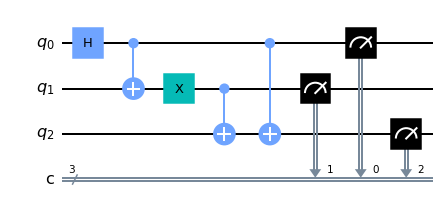

In [3]:
## Zadanie 1 (2 pkt.)

qc = QuantumCircuit(3,3)

qc.h(0)
qc.cx(0,1)
qc.x(1)
qc.cx(1,2)
qc.cx(0,2)

qc.measure([0,1,2],[0,1,2])

qc.draw(output='mpl')

Policz ręcznie (np. na kartce) jak będzie wyglądał stan kwantowy po wykonaniu powyższego obwodu (przed pomiarem), wyznacz jakie są prawdopodobieństwa otrzymania poszczególnych wyników, tj. $|000\rangle$,$|001\rangle$, $|010\rangle$, itd., wykonaj symulację tego obwodu, narysuj histogram i sprawdź czy otrzymane prawdopodobieństwa zgadzają się z wyliczonymi.

0. Stan początkowy to $|000\rangle$. 
1. Po działaniu bramki Hadamarda na $q_0$ dostajemy $\frac{1}{\sqrt{2}}\left( |000\rangle + |100\rangle \right)$
2. CNOT dla qubitów $q_0$ i $q_1$: $\frac{1}{\sqrt{2}}\left( |000\rangle + |110\rangle \right)$
3. NOT dla qubitu $q_2$: $\frac{1}{\sqrt{2}}\left( |010\rangle + |100\rangle \right)$
4. CNOT dla qubitów $q_1$ i $q_2$: $\frac{1}{\sqrt{2}}\left( |011\rangle + |100\rangle \right)$
4. CNOT dla qubitów $q_0$ i $q_2$: $\frac{1}{\sqrt{2}}\left( |011\rangle + |101\rangle \right)$

Powinniśmy dostać szanse $1/2$ na wynik $|011\rangle$ i szansę $1/2$ na wynik $|101\rangle$ 

{'110': 525, '101': 499}


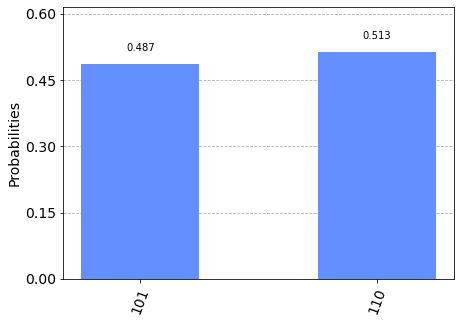

In [3]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

Wynik się zgadza (qiskit zczytuje kubity od końca, czyli '011' to na wykresie '110')

## Zadanie 2 (2 pkt.)

To samo co poprzednio. Bramka $U$ jest zdefiniowana następująco:

$$U\left(\theta,\phi,\lambda\right)=\left(\begin{array}{cc}
\cos\frac{\theta}{2}&-e^{i\lambda}\sin\frac{\theta}{2}\\
e^{i\phi}\sin\frac{\theta}{2}&e^{i(\phi+\lambda)}\cos\frac{\theta}{2}\\
\end{array}\right)$$

Jest to najbardziej ogólna jednokubitowa bramka (unitarna).

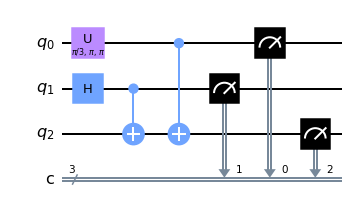

In [4]:
qc = QuantumCircuit(3,3)

qc.u(np.pi/3,np.pi,np.pi,0) #theta=pi/3,phi=pi,lambda=pi
qc.h(1)
qc.cx(1,2)
qc.cx(0,2)

qc.measure([0,1,2],[0,1,2])

qc.draw(output='mpl')

$$U\left(\frac{\pi}{3},\pi,\pi\right)=\left(\begin{array}{cc}
\frac{\sqrt{3}}{2}&\frac{1}{2}\\
\frac{-1}{2}&\frac{\sqrt{3}}{2}\\
\end{array}\right)$$

0. Stan początkowy to $|000\rangle$.

1. Działając bramką U: $\frac{\sqrt{3}}{2}|000\rangle - \frac{1}{2}|100\rangle$

2. Bramka Hadamarda: $\frac{1}{2\sqrt{2}}\left( \sqrt{3}|000\rangle + \sqrt{3}|010\rangle -1|100\rangle -1|110\rangle \right)$

3. Cnot na qubitach $q_1$ i $q_2$: $\frac{1}{2\sqrt{2}}\left( \sqrt{3}|000\rangle + \sqrt{3}|011\rangle -1|100\rangle -1|111\rangle \right)$

4. Cnot na qubitach $q_0$ i $q_2$: $\frac{1}{2\sqrt{2}}\left( \sqrt{3}|000\rangle + \sqrt{3}|011\rangle -1|101\rangle -1|110\rangle \right)$

Otrzymujemy prawdopodobieństwa: $\left|\frac{\sqrt{3}}{2\sqrt{2}}\right|^2 = \frac{3}{8} = 0.375$ dla stanów $|000\rangle$ i $|010\rangle$ oraz $\left| -\frac{1}{2\sqrt{2}}  \right|^2 = \frac{1}{8} = 0.125$ dla stanów $|100\rangle$ i $|110\rangle$


{'110': 380, '011': 123, '101': 125, '000': 396}


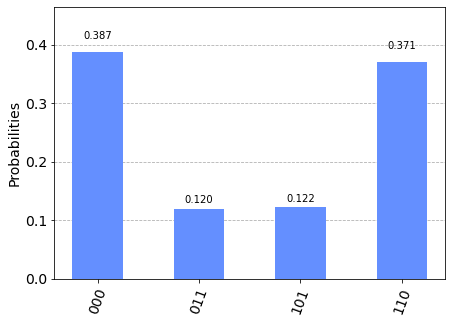

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

## Zadanie 3 (2 pkt.)

W tym zadaniu dokonamy teleportacji stanu kwantowego. Najpierw zdefiniujmy sobie jakiś stan kwantowy, np. generowany przez następującą bramkę:

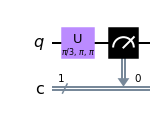

In [6]:
qc = QuantumCircuit(1,1)
qc.u(np.pi/3,np.pi,np.pi,0)
qc.measure([0],[0])
qc.draw(output='mpl')

Jest to następujący stan:

$$\frac{\sqrt{3}}{2}|0\rangle-\frac{1}{2}|1\rangle$$

możemy sprawdzić, że robiąc symulację dostajemy rzeczywiście prawdopodobieństwa $|\frac{\sqrt{3}}{2}|^2=\frac{3}{4}$ oraz $|-\frac{1}{2}|^2=\frac{1}{4}$

{'1': 2017, '0': 6179}


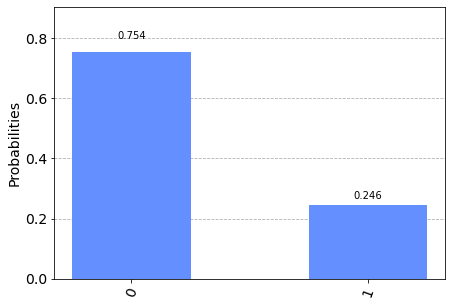

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=8196).result().get_counts()
print(counts)
plot_histogram(counts)

powyższy stan będziemy chcieli przeteleportować, powiedzmy między Alicją i Bobem, zdefiniujmy obwód z 3 kubitami i 3 klasycznymi bitami, tym razem wprowadzimy je za pomocą ClassicalRegister i QuantumRegister, kubit numer 0 będzie tym na którym będzie stan, który chcemy przeteleportować, będzie on w posiadaniu Alicji, kubity nr 1 i nr 2 są kubitami, która wprowadzimy w stan splątany i posłużą nam za pośrednika w teleportacji, kubit nr 1 bedzia miała Alicja a kubit nr 2 Bob.

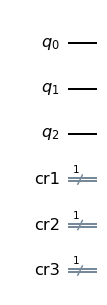

In [8]:
cr1=ClassicalRegister(1,name='cr1')
cr2=ClassicalRegister(1,name='cr2')
cr3=ClassicalRegister(1,name='cr3')

qr=QuantumRegister(3,name='q')

qc = QuantumCircuit(qr,cr1,cr2,cr3)

qc.draw(output='mpl')

następnie dodajemy bramkę generującą stan,który chcemy przeteleportować, na koniec każdego etapu będziemy wstawiać barierę (linia przerywana obrazku) za pomocą metody .barrier(), powinnniśmy otrzymać:

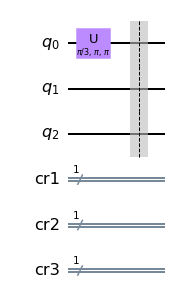

In [9]:
qc.u(np.pi/3,np.pi,np.pi,0)
qc.barrier()

qc.draw(output='mpl')

teraz tworzymy parę splątaną między kubitem numer 1 należącym do Alicji i kubitem numer 2 należącym do Boba, chcemy uzyskać parę splątaną w postaci $\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)$, wygenerujemy ją za pomocą bramki Haadamarda i CNOT-a:

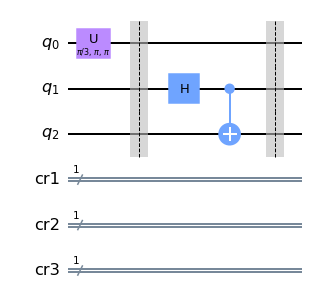

In [10]:
qc.h(1)
qc.cx(1,2)
qc.barrier()

qc.draw(output='mpl')

następnie musimy wykonać pomiar na dwóch kubitach Alicji (nr 0 i nr 1) ale w tzw. bazie Bela, jest to baza w przestrzeni dwóch kubitów skaładająca sie z stanów: $\frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$, $\frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)$, $\frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)$, $\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)$, aby obrócić do bazy Bella należy użyć CNOT-a i Hadamarda.

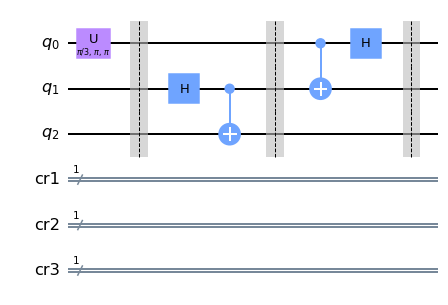

In [11]:
qc.cx(0,1)
qc.h(0)
qc.barrier()

qc.draw(output='mpl')

potem Alicja dokonuje pomiaru na swoich kubitach (nr 0 i nr 1)

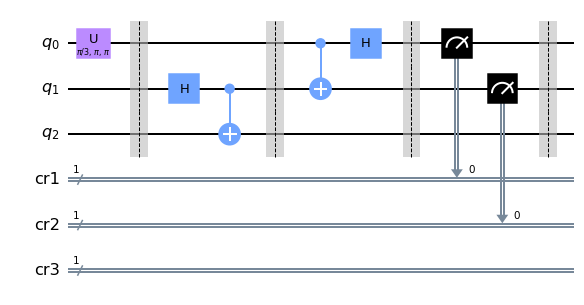

In [12]:
qc.measure([0,1], [0,1])
qc.barrier()

qc.draw(output='mpl')

następnie Alicja przesyła Bobowi otrzymany wynik, tj. albo '00' albo '01' albo '10' albo '11'. Bob stoswonie do wyniku aplikuje na swoim kubicie albo nic albo bramkę $Z=\left(\begin{array}{cc}
1&0\\
0&-1\\
\end{array}\right)$ albo bramkę $X$ albo bramkę $X$ i $Z$, w celu wykonania bramki pod warunkiem określonego wyniku wcześniejszego pomiaru stosujemy metodę .c_if(cr,1), która wykona daną operację pod warunkiem że rejestr klasyczny cr jest równy 1, dlatego właśnie musieliśmy zdefiniować rejestry klasyczne każdy osobno, tj. cr1, cr2, cr3.

Np.:

qc.x(2).c_if(cr2, 1)

oznacza, że do obowdu qc zostanie dodana bramka $X$ na kubicie nr 2, która będzie wykonywana pod warunkiem, że bit cr2 będzie równy 1.

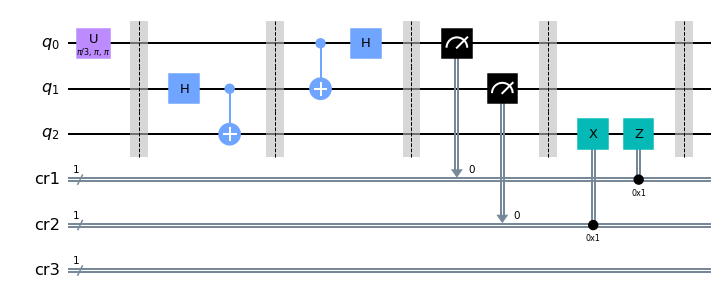

In [13]:
qc.x(2).c_if(cr2, 1)
qc.z(2).c_if(cr1, 1)
qc.barrier()

qc.draw(output='mpl')

po wykonaniu odpowiedniej operacji Bob na swoim kubicie nr 2 uzyska stan taki jaki Alicja miała na początku na swoim kubcie nr 0, warto tutaj zaznaczyć, że Alicja na swoim kubicie nr 0 już nie ma tego stanu, gdyby on tam pozostał łamałoby to tzw. zakaz klonowania.

Na końcu sprawdzimy czy rzeczywiście stan otrzymany na końcu jest poprawny, dokonujemy pomiaru na ostanim kubicie.

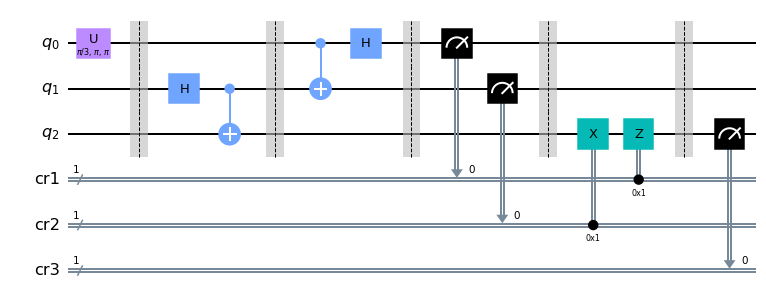

In [14]:
qc.measure([2], [2])

qc.draw(output='mpl')

robimy symulację:

In [15]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=8196).result().get_counts()

następnie musimy zliczyć ile razy otrzymaliśmy '0' na ostanim kubicie i ile razy '1', należy tu pamiętać o konwencji Qiskit-a, który zczytuje wyniki od ostaniego kubitu, potem rysujemy histogram, i porównujemy go z histogramem z poczatku zadania, który odpowiadał stanowi, który chcieliśmy przeteleportować.

In [16]:
counts_last = {0: 0, 1: 0}

for (k, v) in counts.items():
    if k[0] == '0':
        counts_last[0] += v
    else:
        counts_last[1] += v

{0: 6151, 1: 2045}


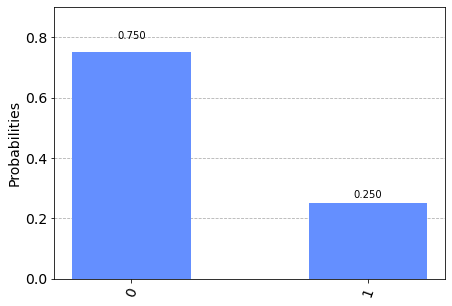

In [17]:
print(counts_last)
plot_histogram(counts_last)

## Zadanie 4 (2 pkt.)

Zadanie do wykonania ręcznie (np. na kartce).

Załóżmy, że stan który chcemy teleportować ma ogólną postać:

$$\alpha|0\rangle+\beta|1\rangle$$

zatem początkowy stan całego kwantowego rejestru to:

$$\alpha|000\rangle+\beta|100\rangle$$

zapisz kolejne kroki wykonywane w teleportacji do momentu pomiarów wykonywanych przez Alicję, w wyniku pomiaru stan kolapsuje losowo na jeden ze stanów bazy w której dokonujemy pomiaru, rozważ wszystkie cztery przypadki, tj. pierwszy przypadek dostajemy w wyniku pomiaru '00' i stan na dwóch pierwszych kubitach (tych na których był pomiar) kolapsuje do $|00\rangle$, drugi przypadek dostajemy w wyniku pomiaru '01' i stan na dwóch pierwszych kubitach (tych na których był pomiar) kolapsuje do $|01\rangle$, itd. Następnie w każdym przypadku wykonaj na kubicie Boba odpowiednią operację i zobacz, że stan który uzyska Bob to ten, który chcieliśmy przeteleportować, czyli:

$$\alpha|0\rangle+\beta|1\rangle$$

0. Stan początkowy: $\alpha|000\rangle + \beta|100\rangle$

1. Bramka Hadamarda na $q_1$: $\frac{1}{\sqrt{2}}\alpha \left(|000\rangle + |010\rangle \right) + \frac{1}{\sqrt{2}}\beta\left(|100\rangle + |110\rangle \right)$

2. CNOT na qubitach $q_1$ i $q_2$: $\frac{1}{\sqrt{2}}\alpha \left(|000\rangle + |011\rangle \right) + \frac{1}{\sqrt{2}}\beta\left(|100\rangle + |111\rangle \right)$

3. CNOT na qubitach $q_0$ i $q_1$: $\frac{1}{\sqrt{2}}\alpha \left(|000\rangle + |011\rangle \right) + \frac{1}{\sqrt{2}}\beta\left(|110\rangle + |101\rangle \right)$

4. Bramka Hadamarda na $q_0$: 

$ \frac{1}{\sqrt{2}}\alpha \left( \frac{1}{\sqrt{2}}\left( |000\rangle + |100\rangle  \right) + \frac{1}{\sqrt{2}}\left ( |011\rangle + |111\rangle \right) \right) 
+ \frac{1}{\sqrt{2}}\beta  \left( \frac{1}{\sqrt{2}}\left( |010\rangle - |110\rangle \right) + \frac{1}{\sqrt{2}}\left ( |001\rangle - |101\rangle \right)\right)$

5. Po uproszczeniu:

$ \frac{1}{2}\alpha \left( |000\rangle + |100\rangle  + |011\rangle + |111\rangle \right) 
+ \frac{1}{2}\beta  \left( |010\rangle - |110\rangle  + |001\rangle - |101\rangle \right)$


Dwa pierwsze kubity i odpowiadające stany:

'00' ---> $\frac{1}{2}\alpha|000\rangle + \frac{1}{2}\beta|001\rangle$

'01' ---> $\frac{1}{2}\alpha|011\rangle + \frac{1}{2}\beta|010\rangle$

'10' ---> $\frac{1}{2}\alpha|100\rangle - \frac{1}{2}\beta|101\rangle$

'11' ---> $\frac{1}{2}\alpha|111\rangle - \frac{1}{2}\beta|110\rangle$

Jeżeli drugi bit to '1' to wykonujemy bramkę $X$ na kubicie $q_2$, jeżeli pierwszy bit to '1' wykonujemy bramkę $Z$ na kubicie $q_2$

Czyli:

- '00' - żadnej bramki
- '01' - bramka $X$
- '10' - bramka $Z$
- '11' - bramka $X$ i bramka $Z$

'00' ---> $\frac{1}{2}\alpha|000\rangle + \frac{1}{2}\beta|001\rangle$

'01' ---> $\frac{1}{2}\alpha|010\rangle + \frac{1}{2}\beta|011\rangle$

'10' ---> $\frac{1}{2}\alpha|100\rangle + \frac{1}{2}\beta|101\rangle$

'11' ---> $\frac{1}{2}\alpha|110\rangle + \frac{1}{2}\beta|111\rangle$

Ostatecznie:
$\frac{1}{2}\alpha \left( |000\rangle + |010\rangle + |100\rangle + |110\rangle \right)
+\frac{1}{2}\beta \left( |001\rangle + |011\rangle + |101\rangle + |111\rangle \right)$

Niezależnie od zmierzonych dwóch pierwszych kubitów u Alicji, stan u Boba zawsze będzie:
$$\alpha|0\rangle + \beta|1\rangle$$